## Importing and Loading the data

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Haruloves2sleep
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/sms-spam-collection-dataset/spam.csv", encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1104,spam,Message Important information for O2 user. Tod...,NaN,NaN,NaN
3421,spam,Freemsg: 1-month unlimited free calls! Activat...,NaN,NaN,NaN
1667,ham,So now my dad is gonna call after he gets out ...,NaN,NaN,NaN
755,ham,So why didnt you holla?,NaN,NaN,NaN
4013,ham,"Sorry, I can't text &amp; drive coherently, se...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
### drop last 3 values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace = True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#renaming the cols
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
## label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df['target'] = encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
## missing values
df.isnull().sum()

,0
target,0
text,0


In [23]:
## check for duplicate values
df.duplicated().sum()

np.int64(403)

In [24]:
#remove the duplicates
df = df.drop_duplicates(keep = 'first')

In [27]:
df.shape

(5169, 2)

## EDA

In [28]:
df['target'].value_counts()

,count
target,
0,4516
1,653


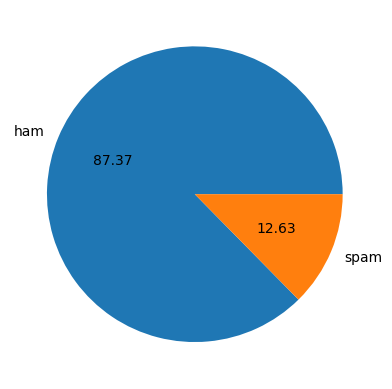

In [29]:
### plot the targets
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels = ['ham' , 'spam'] , autopct='%0.2f')
plt.show()

Data is imbalanced

In [69]:
import nltk #Natural language tool kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [66]:
nltk.download('punkt_tab')
nltk.download('punkt')
## Punkt is an unsupervised machine learning-based
## tokenizer that helps split text into sentences and words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
#print(df['text'][1])
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
print(df.head())

   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15  


In [50]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
#

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [54]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

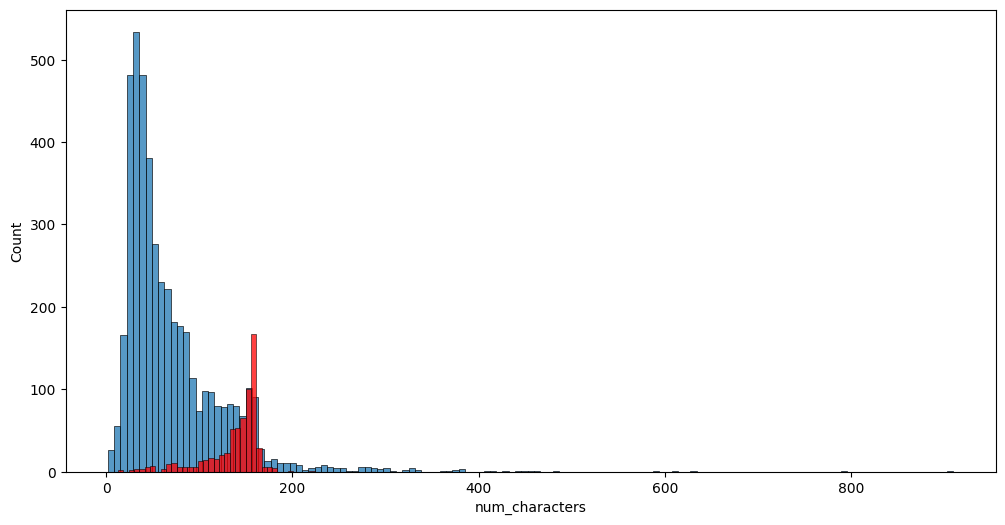

In [55]:
plt.figure(figsize = (12 , 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

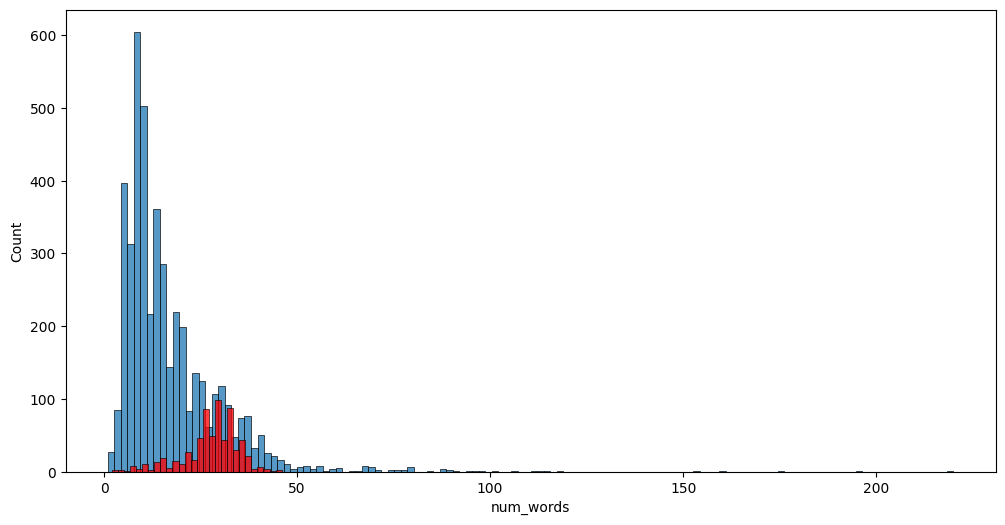

In [56]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

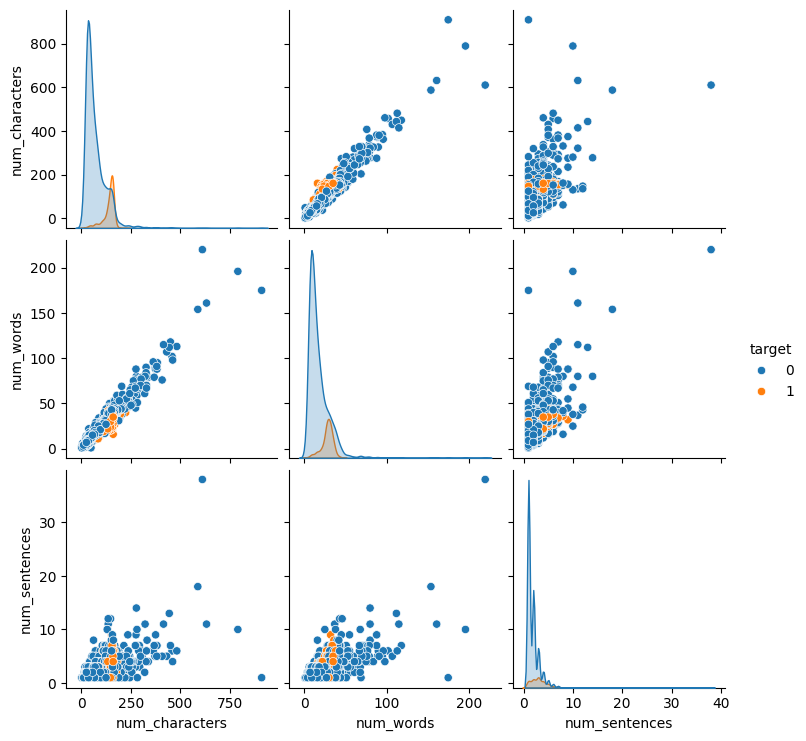

In [57]:

sns.pairplot(df,hue='target')

<Axes: >

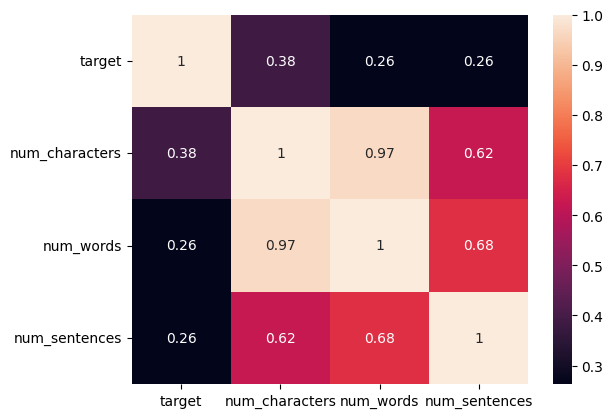

In [60]:
# Calculate the correlation matrix only on numeric features
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

## Data Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [76]:
import string

In [86]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [87]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum(): #removes special characters
      y.append(i)


  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [90]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [89]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [91]:
df['transformed_text'] = df['text'].apply(transform_text)

In [92]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [100]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size=10 , background_color='white')

In [101]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

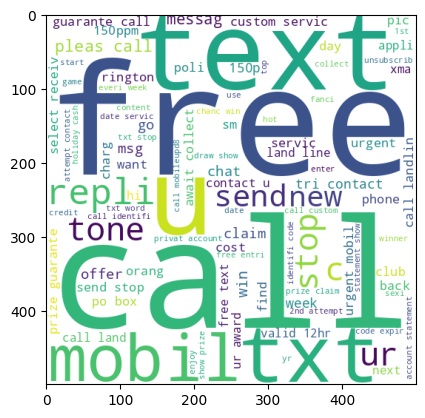

In [102]:
plt.imshow(spam_wc)

In [103]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

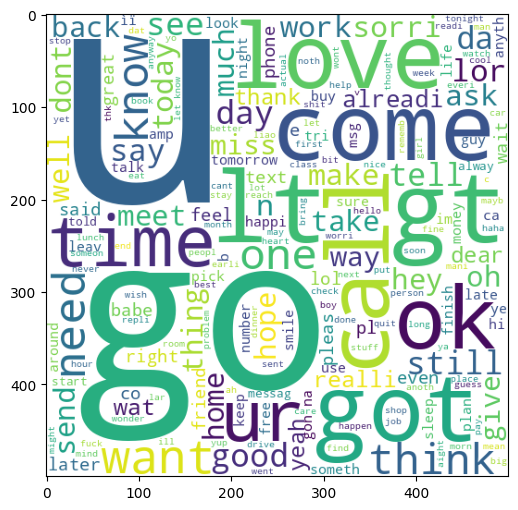

In [104]:

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [120]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [121]:
len(spam_corpus)

9939

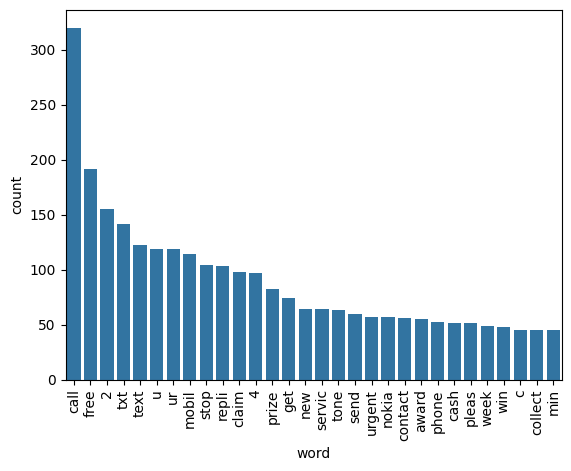

In [122]:
from collections import Counter

# Create a DataFrame from the most common words in spam_corpus
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Use the 'word' column for the x-axis and the 'count' column for the y-axis
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [123]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [124]:
len(ham_corpus)

35404

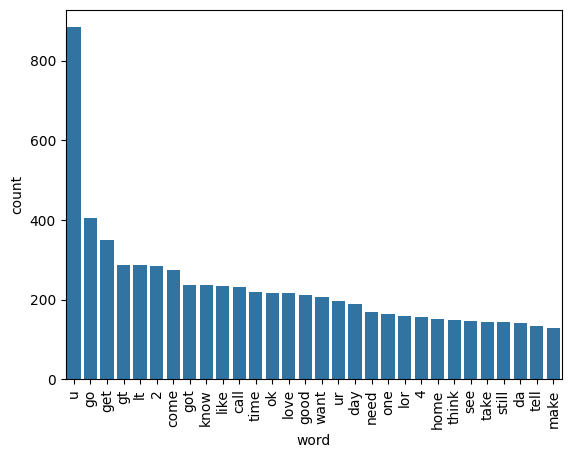

In [125]:
# Create a DataFrame from the most common words in spam_corpus
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Use the 'word' column for the x-axis and the 'count' column for the y-axis
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Model Building

**CountVectorizer** is a feature extraction technique in Natural Language Processing (NLP) that converts a collection of text documents into a bag-of-words (BoW) representation. It is provided by `sklearn.feature_extraction.text`.

**TfidfVectorizer** (Term Frequency-Inverse Document Frequency) is an NLP feature extraction technique that transforms text data into numerical vectors by assigning importance to words based on how frequently they appear in a document relative to all other documents. It is provided by `sklearn.feature_extraction.text`.

In [126]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [142]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [143]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [146]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [149]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [150]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


from our experiment
tfidf --> mnb

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [152]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [153]:

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [154]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [155]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [156]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [157]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [158]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [159]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [160]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.965184
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


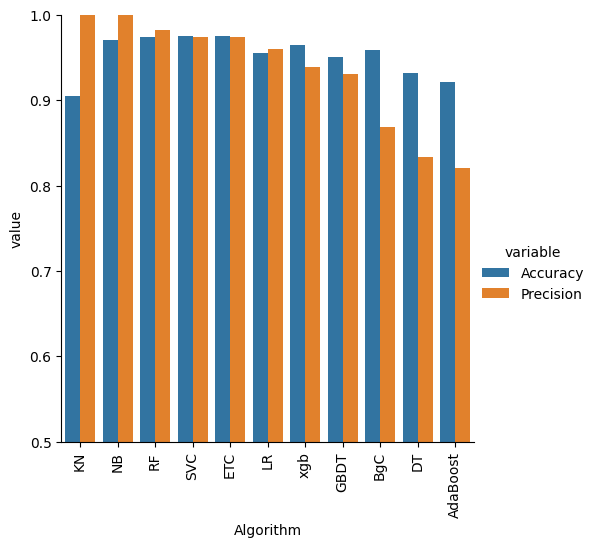

In [161]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [163]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl' , 'wb'))